[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rupaltotale/Movie-Genre-Predictor/blob/master/Presentation.ipynb)
# Predicting Movie Genres: Presentation

The goal of this project is to build a model that can effectively predict movie genres based on a comprehensive list of features about movies such as movie summary, tagline, budget, revenue, user ratings, users who like the movie, cast and crew members, keywords (to describe movie), etc. 

Since movies are not one-dimensional and can span multiple genres, a single label classification model will not suffice. Instead, we need to build a multi label classification model to predict the genres of a movie. The image below illustrates the different types of classification models.
![Different type of classification models](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/04/img_1.png)

## Research Question 
Can we predict the genre(s) of a movie given its features (such as plot description, ratings, cast and crew members, etc)?

## Part I: Collecting the data
We collected comprehensive movie data that is broken up into multiple CSVs from [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset). The dataset contained the following CSVs:
- links_small.csv: links to iMDB and tMDB for movies | Not used
- links.csv: links to iMDB and tMDB for fewer movies | Not used
- ratings_small.csv: user rating for fewer movies | Not used

---
- genres.csv: all genres that can define a movie | Used
- ratings.csv: user rating for many movies | Used
- credits.csv: crew and cast information about each movie | Used
- keywords.csv: keywords for each movie | Used
- movies_metadata.csv: information about each movie | Used


In [0]:
import pandas as pd
from google.colab import drive
from IPython.display import Image
drive.mount('drive')
data_dir = "drive/My Drive/301 Project/Data/"
image_dir = "drive/My Drive/301 Project/Data/images/"

In [0]:
pd.read_csv(data_dir + "ratings.csv").head(1)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529


In [0]:
pd.read_csv(data_dir + "credits.csv").head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [0]:
pd.read_csv(data_dir + "keywords.csv").head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [0]:
pd.read_csv(data_dir + "movies_metadata.csv", low_memory=False).head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


## Part II: Cleaning the data


In [0]:
pd.read_csv(data_dir + "ratings.csv")
df_movies = pd.read_csv(data_dir + "cleaned_dataframe.csv").drop(
    columns=["Unnamed: 0"],
    axis=1
)
cols = df_movies.columns
df_movies.head(1)

,Animation,Horror,Mystery,Fantasy,Romance,TV Movie,Family,Documentary,Western,Science Fiction,Foreign,Crime,Adventure,Thriller,Comedy,War,Drama,History,Action,Music,id,original_title,budget,overview,popularity,production_companies,revenue,runtime,tagline,vote_average,vote_count,collection,Composer,Director,Screenplay,cast,keywords,rating_average,userId_who_like
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,862,Toy Story,30000000,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar_Animation_Studios,373554033.0,81.0,NaN,7.7,5415.0,Toy_Story_Collection,NaN,John_Lasseter,Alec_Sokolow,Tom_Hanks Tim_Allen Don_Rickles Jim_Varney Wal...,jealousy toy boy friendship friends rivalry bo...,3.59893,2103 6177 6525 8659 9328 9682 11214 13839 1523...


We cleaned the each CSV in the following manner:
- ratings.csv: 
  - We used the `userId` and the `rating` column to determine which userIds liked each movie and stored this in `userId_who_like`
  - We took the average rating from all users for a movie and stored this in a column called `rating_average`

In [0]:
df_movies[cols[37:]].head(1)

,rating_average,userId_who_like
0,3.59893,2103 6177 6525 8659 9328 9682 11214 13839 1523...


- credits.csv: 
  - We extracted `Screenplay`, `Director`, and `Composer` from the `crew` column
  - We transformed `cast` into a string of cast member names with each name underscored (instead of spaces) and all names space seperated. 

In [0]:
df_movies[cols[32:36]].head(2)

,Composer,Director,Screenplay,cast
0,NaN,John_Lasseter,Alec_Sokolow,Tom_Hanks Tim_Allen Don_Rickles Jim_Varney Wal...
1,James_Horner,Joe_Johnston,Jim_Strain,Robin_Williams Jonathan_Hyde Kirsten_Dunst Bra...


- keywords.csv: 
  - We transformed `keywords` into a string of keywords with each keyword underscored (for spaces) and all keywords apce seperated

In [0]:
df_movies[cols[36:37]].head(2)

,keywords
0,jealousy toy boy friendship friends rivalry bo...
1,board_game disappearance based_on_children's_b...


- movies_metadata.csv: 
  - We only preserved some columns from this dataset: 
  `budget, id, original_title,	overview,	popularity, 
    production_companies, revenue, runtime, tagline, vote_average, vote_count,
    [genres]`
  - We transformed `collection` into the name of the collection with underscore replacing space
  - We transformed `production_companies` into a string of companies with each company underscored and all companies space seperated. 
  - We also added a column for each genre as it would be useful for visual exploration and building a machine learning model. If a movie belonged to a certain genre, the value of the movie for that that genre would be 1, else 0. 

In [0]:
df_movies[cols[:32]].head(2)

,Animation,Horror,Mystery,Fantasy,Romance,TV Movie,Family,Documentary,Western,Science Fiction,Foreign,Crime,Adventure,Thriller,Comedy,War,Drama,History,Action,Music,id,original_title,budget,overview,popularity,production_companies,revenue,runtime,tagline,vote_average,vote_count,collection
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,862,Toy Story,30000000,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar_Animation_Studios,373554033.0,81.0,NaN,7.7,5415.0,Toy_Story_Collection
1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,8844,Jumanji,65000000,When siblings Judy and Peter discover an encha...,17.015539,TriStar_Pictures Teitler_Film Interscope_Commu...,262797249.0,104.0,Roll the dice and unleash the excitement!,6.9,2413.0,NaN


We merged these datasets to produce a complete movies dataset with 39 columns, 20 of which were for genres. 

## Part III: Exploring the data
In this section, we explored the relationships between genres and different categorical and quantitative features in our movies dataset by using bar plots and word clouds. 

### Quantitative features useful in determining genres 
In the following bar plots, there is a clear difference between different genres for the feature whose average is being plotted. 

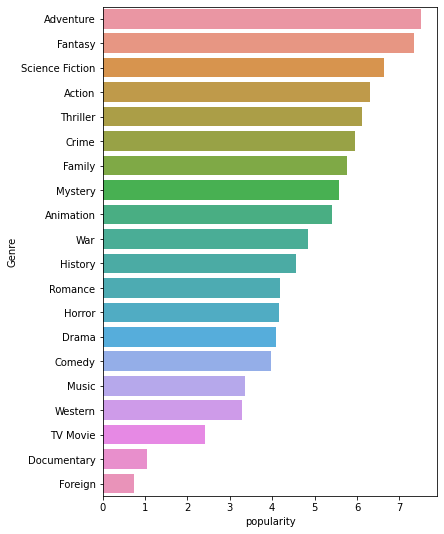

In [0]:
Image(image_dir + "Average_popularity_plot.png")

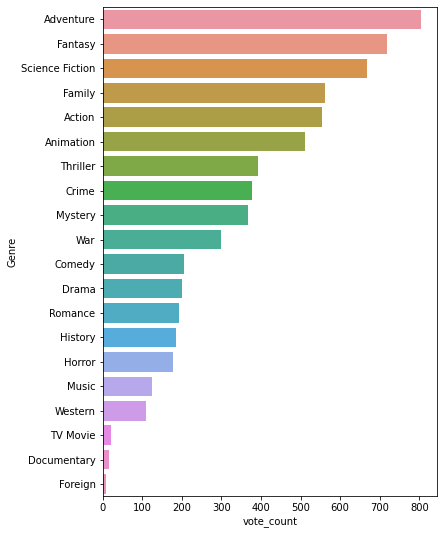

In [0]:
Image(image_dir + "Average_vote_count_plot.png")

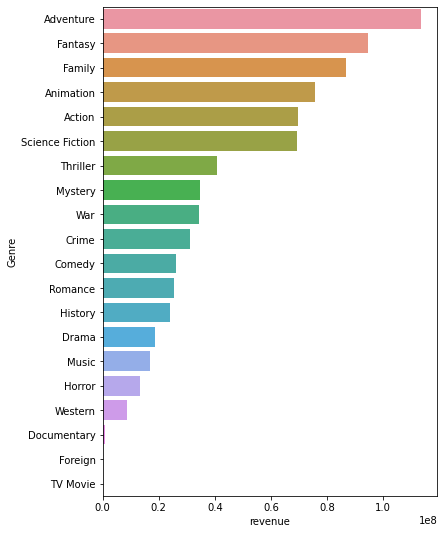

In [0]:
Image(image_dir + "Average_revenue_plot.png")

### Quantitative features not as useful in determining genres 

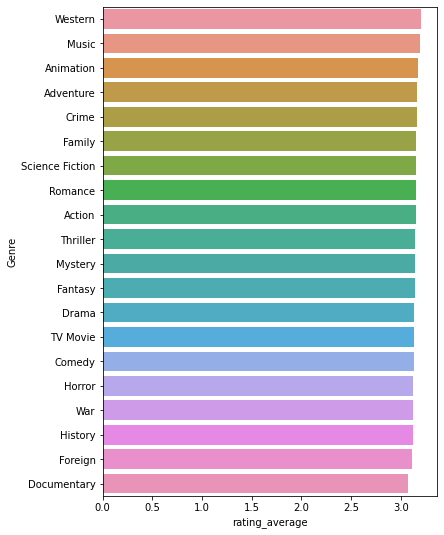

In [0]:
Image(image_dir + "Average_rating_average_plot.png")

### Categorical features useful in determining genres
We generated word clouds for all genres for various categorical features. The keywords and cast members associated with distict genres were accurately depicted in the words clouds (examples shown below) and thus these features are worth considering. 

#### Keywords

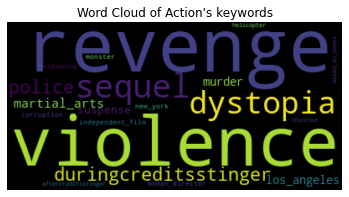

In [0]:
Image(image_dir + "Action_keywords.png")

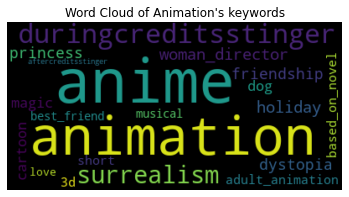

In [0]:
Image(image_dir + "Animation_keywords.png")

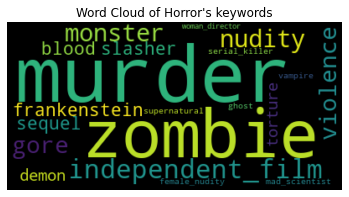

In [0]:
Image(image_dir + "Horror_keywords.png")

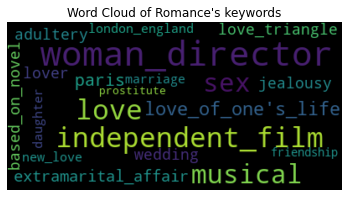

In [0]:
Image(image_dir + "Romance_keywords.png")

#### Cast

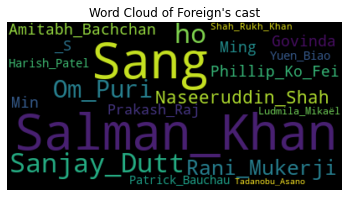

In [0]:
Image(image_dir + "Foreign_cast.png")

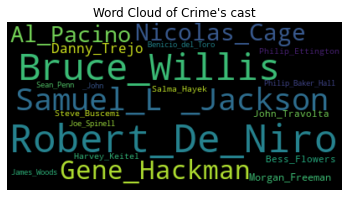

In [0]:
Image(image_dir + "Crime_cast.png")

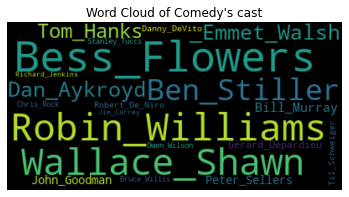

In [0]:
Image(image_dir + "Comedy_cast.png")

We also plotted bar charts for the most frequent `production_companies, collections, Composer,	Director,	and Screenplay` for a few genres and did light research to determine which features were worth considering. Only `collection` produced reasonable results:

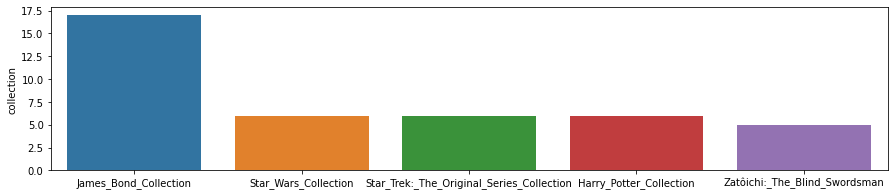

In [0]:
Image(image_dir + "Adventure_collection.png")

## Part IV: Building an ML model


**ohe** = transform column with OneHotEncoder<br>
**tfidf** = transform column with TfidfVectorizer<br>
**scale** = transform column with StandardScaler

In [0]:
testing_types = {
  'Composer' : "ohe",
  'Director' : "ohe",
  'Screenplay' : "ohe",
  'budget' : "scale",
  'cast' : "tfidf",
  'collection' : "ohe",
  'keywords' : "tfidf",
  'original_title' : "tfidf",
  'overview' : "tfidf",
  'popularity' : "scale",
  'production_companies' : "tfidf",
  'rating_average' : "scale",
  'revenue' : "scale",
  'runtime' : "scale",
  'userId_who_like' : "tfidf",
  'vote_average' : "scale",
  'vote_count' : "scale",
  'tagline' : "tfidf",
  'mod_overview' : "tfidf"
}

#### From the data exploration, we expected these features to be good

In [0]:
expected_good_features = [
    "budget", "popularity", "revenue", 
    "vote_count", "collection",
    "cast", "keywords"
]

#### Scoring

We used f1 scoring.
<br>At first we used hamming loss (fraction of incorrect to total), but it doesn't very accurately reflect the actual genres predicted.
<br>f1 is a combo of precision and recall, so for 

### Optimizing KNeaest and SDG using features we expected to be good

### Models

We tested
1. **Ridge**
2. **Logistic**
3. **PassiveAggressive**
4. **SDG**: alpha: 1e-8
5. **KNeighbors**: Neighbors: 2
6. **Random Forest**

#### OneVsRestClassifier with SGDClassifier as estimator
- For each genre, that genre becomes a positive sample and all others become negative, making it a binary classifier problem. Then it just trains and predicts a 1 or a 0 based on each binary classifier.
- SGDClassifiers are relatively good for large text classifications

In [0]:
score = get_assemble_score(
    expected_good_features, 
    testing_types,
    give_certain_models(
        OneVsRestClassifier, 
        SGDClassifier
    )
)

### Features

As an initial test, we just tested all the features individually.

In [0]:
for feature in all_features:
  score = get_assemble_score(
      [feature],
      ...
  )
  
  add score to a score series...

- Textual features are much better than any numerical feature.